<span style="font-size:3.5em;">Predicting Coupon Usage </span>

# Bussiness Problems 

# Data Cleaning 

## Import

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Draws graphes 
import seaborn as sns #Draws intuitive graphs 
import graphviz
np.random.seed(0)
from sklearn.model_selection import train_test_split #splits data 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Creates accuracy score, confustion matris, and classification report
from sklearn.tree import DecisionTreeClassifier #creates decision tree
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier #creaters Bagging Classifier and Random Forest 
import warnings #Removes warnings


warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
cd table.csv

[WinError 267] The directory name is invalid: 'table.csv'
C:\Users\laure\Flatiron\Untitled Folder


In [3]:
df = pd.read_csv(r"C:\Users\laure\Flatiron\Untitled Folder\table.csv", sep=';')
df.head()
df.describe()

,id,campaign_id,coupon_id,redemption_status,customer_id,rented,family_size,income_bracket
count,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000,78369.000000
mean,64347.975449,13.974441,566.363243,0.009302,394.739591,0.029642,1.004798,2.418801
std,37126.440855,8.019215,329.966054,0.095999,507.905423,0.169598,1.177557,2.899768
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32260.000000,8.000000,280.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64318.000000,13.000000,597.000000,0.000000,17.000000,0.000000,1.000000,1.000000
75%,96577.000000,13.000000,857.000000,0.000000,775.000000,0.000000,2.000000,5.000000
max,128595.000000,30.000000,1115.000000,1.000000,1581.000000,1.000000,4.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 78369 non-null  int64 
 1   campaign_id        78369 non-null  int64 
 2   coupon_id          78369 non-null  int64 
 3   redemption_status  78369 non-null  int64 
 4   customer_id        78369 non-null  int64 
 5   age_range          39906 non-null  object
 6   marital_status     22023 non-null  object
 7   rented             78369 non-null  int64 
 8   family_size        78369 non-null  int64 
 9   no_of_children     10301 non-null  object
 10  income_bracket     78369 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 6.6+ MB


## Fill in NULL values 

In [5]:
df_columns = df.columns
for i in df_columns:
    print('\033[1m' + i.upper() + '\033[0m')
    print(df[[i]].value_counts(ascending=False))
    print('___________________________________________________')

ID
id    
128595    1
42866     1
42851     1
42855     1
42858     1
         ..
85769     1
85770     1
85774     1
85776     1
1         1
Length: 78369, dtype: int64
___________________________________________________
CAMPAIGN_ID
campaign_id
13             22606
8              22555
30              6467
26              6056
29              3895
9               3168
11              2782
12              2550
5               1827
10              1723
7               1584
4                972
2                768
28               476
3                408
27               324
1                143
6                 65
dtype: int64
___________________________________________________
COUPON_ID
coupon_id
705          570
470          447
691          405
468          366
1043         357
            ... 
832           12
835           12
836           12
837           12
724           12
Length: 866, dtype: int64
___________________________________________________
REDEMPTION_STATUS
redempti

In [6]:
#1
print('1:' + str(3279/39906))
#2                  
print('2:' + str(3737/39906))
#3                  
print('3:' + str(3486/39906))
#4                  
print('4:' + str(7983/39906))
#5                 
print('5:' + str(10205/39906))
#6                  
print('6:' + str(4465/39906))
#7                  
print('7:' + str(1713/39906))
#8                  
print('8:' + str(1783/39906))
#9                  
print('9:' + str(1818/39906))
#10                  
print('10:' + str(513/39906))
#11                  
print('11:' + str(234/39906))
#12                  
print('12:' + str(690/39906))


1:0.08216809502330477
2:0.09364506590487646
3:0.08735528491956097
4:0.2000451059990979
5:0.255725955996592
6:0.11188793665113016
7:0.04292587580814915
8:0.04467999799528893
9:0.04555705908885882
10:0.012855209742895805
11:0.005863779882724403
12:0.017290632987520673


In [7]:
df[['income_bracket']].value_counts(ascending=False)

income_bracket
0                 38463
5                 10205
4                  7983
6                  4465
2                  3737
3                  3486
1                  3279
9                  1818
8                  1783
7                  1713
12                  690
10                  513
11                  234
dtype: int64

In [8]:
df['income_bracket']=df['income_bracket'].replace(0, np.nan)

In [9]:
df['income_bracket'].isnull().sum()

38463

In [10]:
df['income_bracket'] = df['income_bracket'].fillna(pd.Series(np.random.choice(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], 
                                                  p=[.08, .09, .09, .20, .26, .11, .04, .04, .05, .01, .01, .02], size= len(df))))

Need to fill in NULL values in:
* age_range
* marital_status
* no_of_children

In [11]:
print(str(round(((((df['age_range'].isna().sum()))/len(df))*100),2)) 
+ '% Null in age_range')
print(str(round(((((df['marital_status'].isna().sum()))/len(df))*100),2)) 
+ '% Null in marital_status')
print(str(round(((((df['no_of_children'].isna().sum()))/len(df))*100),2)) 
+ '% Null in no_of_children')

49.08% Null in age_range
71.9% Null in marital_status
86.86% Null in no_of_children


Will drop no_of_children since high amount of null values and can not predict values from other columns.

In [12]:
df = df.drop('no_of_children', axis = 1)

In [13]:
df = df.drop('id', axis = 1)

Use single number to Represent age catorgory. <br/>
Use single number to represent material status (1,2,3) <br/>
Use single number to represent number of children 


<b> AGE_RANGE </b>
<br> 18-25 will be 1
<br> 26-35 will be 2
<br> 36-45 will be 3
<br> 46-55 will be 4
<br> 56-70 will be 5
<br> 70+ will be 6


In [14]:
df['age_range']=df['age_range'].replace({'18-25' : '1', '26-35' : '2', '36-45' : '3', '46-55' : '4', '56-70' : '5', '70+' : '6'})
df['age_range']

0          4
1          3
2          4
3        NaN
4          4
        ... 
78364      6
78365      6
78366    NaN
78367    NaN
78368    NaN
Name: age_range, Length: 78369, dtype: object

Text(0.5, 1.0, 'age_range')

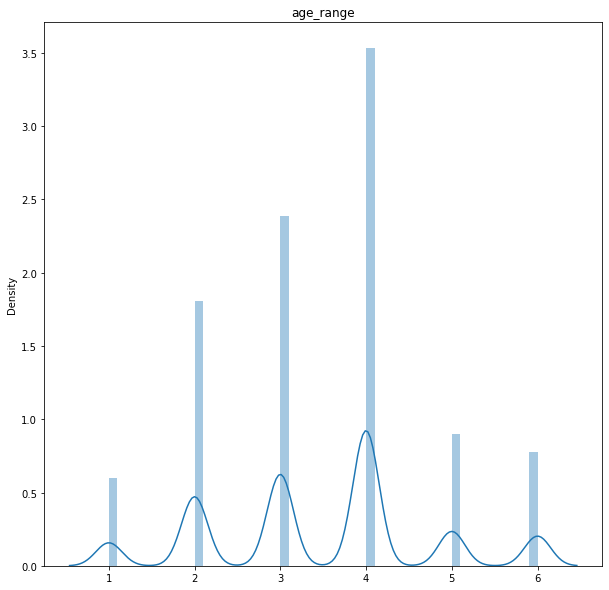

In [15]:
figure, ax= plt.subplots(figsize = (10,10))
sns.distplot(df, x = df['age_range'] )
plt.title('age_range')
    

In [16]:
# 1 
print(2398/ 39906)
# 2
print(7203/ 39906)
# 3
print(9534/ 39906)
# 4
print(14094/ 39906)
# 5
print(3583/ 39906)
# 6
print(3094/ 39906)


0.06009121435373127
0.1804991730566832
0.23891144188843783
0.3531799729364005
0.08978599709316895
0.0775322006715782


In [17]:
df['age_range'] = df['age_range'].fillna(pd.Series(np.random.choice(['1', '2', '3', '4', '5', '6'], 
                                                  p=[.06, .18, .24, .35, .09, .08], size= len(df))))

<b> MARITAL_STATUS </b>
<br> Married will be 1
<br> Single will be 0
<br> Nan will be 2

In [18]:
df['marital_status']=df['marital_status'].replace({'Married': '1', 'Single': '0'})
df['marital_status']

0        NaN
1          1
2          1
3        NaN
4          1
        ... 
78364      1
78365      1
78366    NaN
78367    NaN
78368    NaN
Name: marital_status, Length: 78369, dtype: object

Text(0.5, 1.0, 'marital_status')

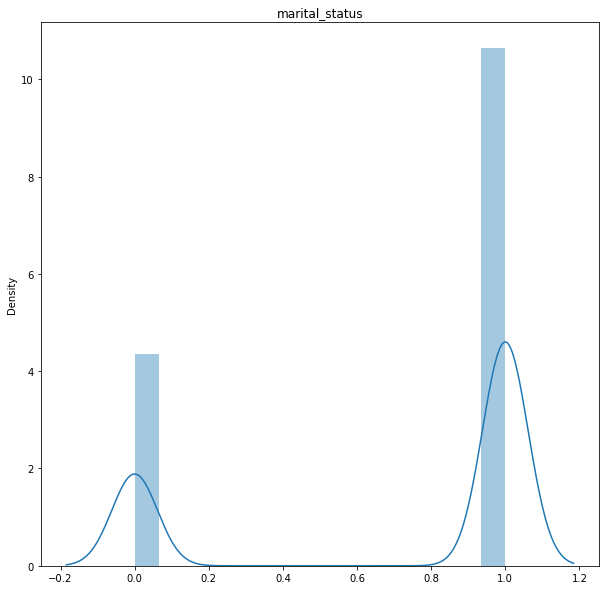

In [19]:
figure, ax= plt.subplots(figsize = (10,10))
sns.distplot(df, x = df['marital_status'] )
plt.title('marital_status')
    

In [20]:
#Convert NaN to 2 for marital_status
df['marital_status'].fillna(3, inplace=True)
df['marital_status']

0        3
1        1
2        1
3        3
4        1
        ..
78364    1
78365    1
78366    3
78367    3
78368    3
Name: marital_status, Length: 78369, dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   campaign_id        78369 non-null  int64 
 1   coupon_id          78369 non-null  int64 
 2   redemption_status  78369 non-null  int64 
 3   customer_id        78369 non-null  int64 
 4   age_range          78369 non-null  object
 5   marital_status     78369 non-null  object
 6   rented             78369 non-null  int64 
 7   family_size        78369 non-null  int64 
 8   income_bracket     78369 non-null  object
dtypes: int64(6), object(3)
memory usage: 5.4+ MB


In [22]:
df['age_range'] = df['age_range'].astype(str).astype(int)

In [23]:
df['marital_status'] = df['marital_status'].astype(str).astype(int)

In [24]:
#df['repeat_customer']=

# Data Exploration 

In [25]:
df_columns = df.columns

In [26]:
# for i in df_columns:
#     figure, ax= plt.subplots(figsize = (10,10))
#     sns.distplot(df, x = df[i])
#     plt.title(i)
    

In [27]:
#h = sns.pairplot(df, hue = 'redemption_status')

In [28]:
df.columns

Index(['campaign_id', 'coupon_id', 'redemption_status', 'customer_id',
       'age_range', 'marital_status', 'rented', 'family_size',
       'income_bracket'],
      dtype='object')

## Prediction Modeling

### Deciesion Tree - base

In [29]:
campaign_id_dummies = pd.get_dummies(df['campaign_id'], prefix = 'campaign_id', drop_first = True)
coupon_id_dummies = pd.get_dummies(df['coupon_id'], prefix = 'coupon_id', drop_first = True)
customer_id_dummies = pd.get_dummies(df['customer_id'], prefix = 'customer_id', drop_first = True)
age_range_dummies = pd.get_dummies(df['age_range'], prefix = 'age_range', drop_first = True)
marital_status_dummies = pd.get_dummies(df['marital_status'], prefix = 'marital_status', drop_first = True)
rented_dummies = pd.get_dummies(df['rented'], prefix = 'rented', drop_first = True)
family_size_dummies = pd.get_dummies(df['family_size'], prefix = 'family_size', drop_first = True)
income_bracket_dummies = pd.get_dummies(df['income_bracket'], prefix = 'income_bracket', drop_first = True)
redemption_status = df['redemption_status']


In [30]:
df_dummies=pd.concat([redemption_status, coupon_id_dummies, age_range_dummies, 
                      marital_status_dummies, rented_dummies, family_size_dummies, income_bracket_dummies], axis = 1)
df_dummies.shape
#df_dummies.head()

(78369, 901)

In [80]:
y = df_dummies['redemption_status']
X = df_dummies.drop('redemption_status', axis = 1)
 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = .75, test_size=.25, random_state=10)

In [81]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 10, random_state = 10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

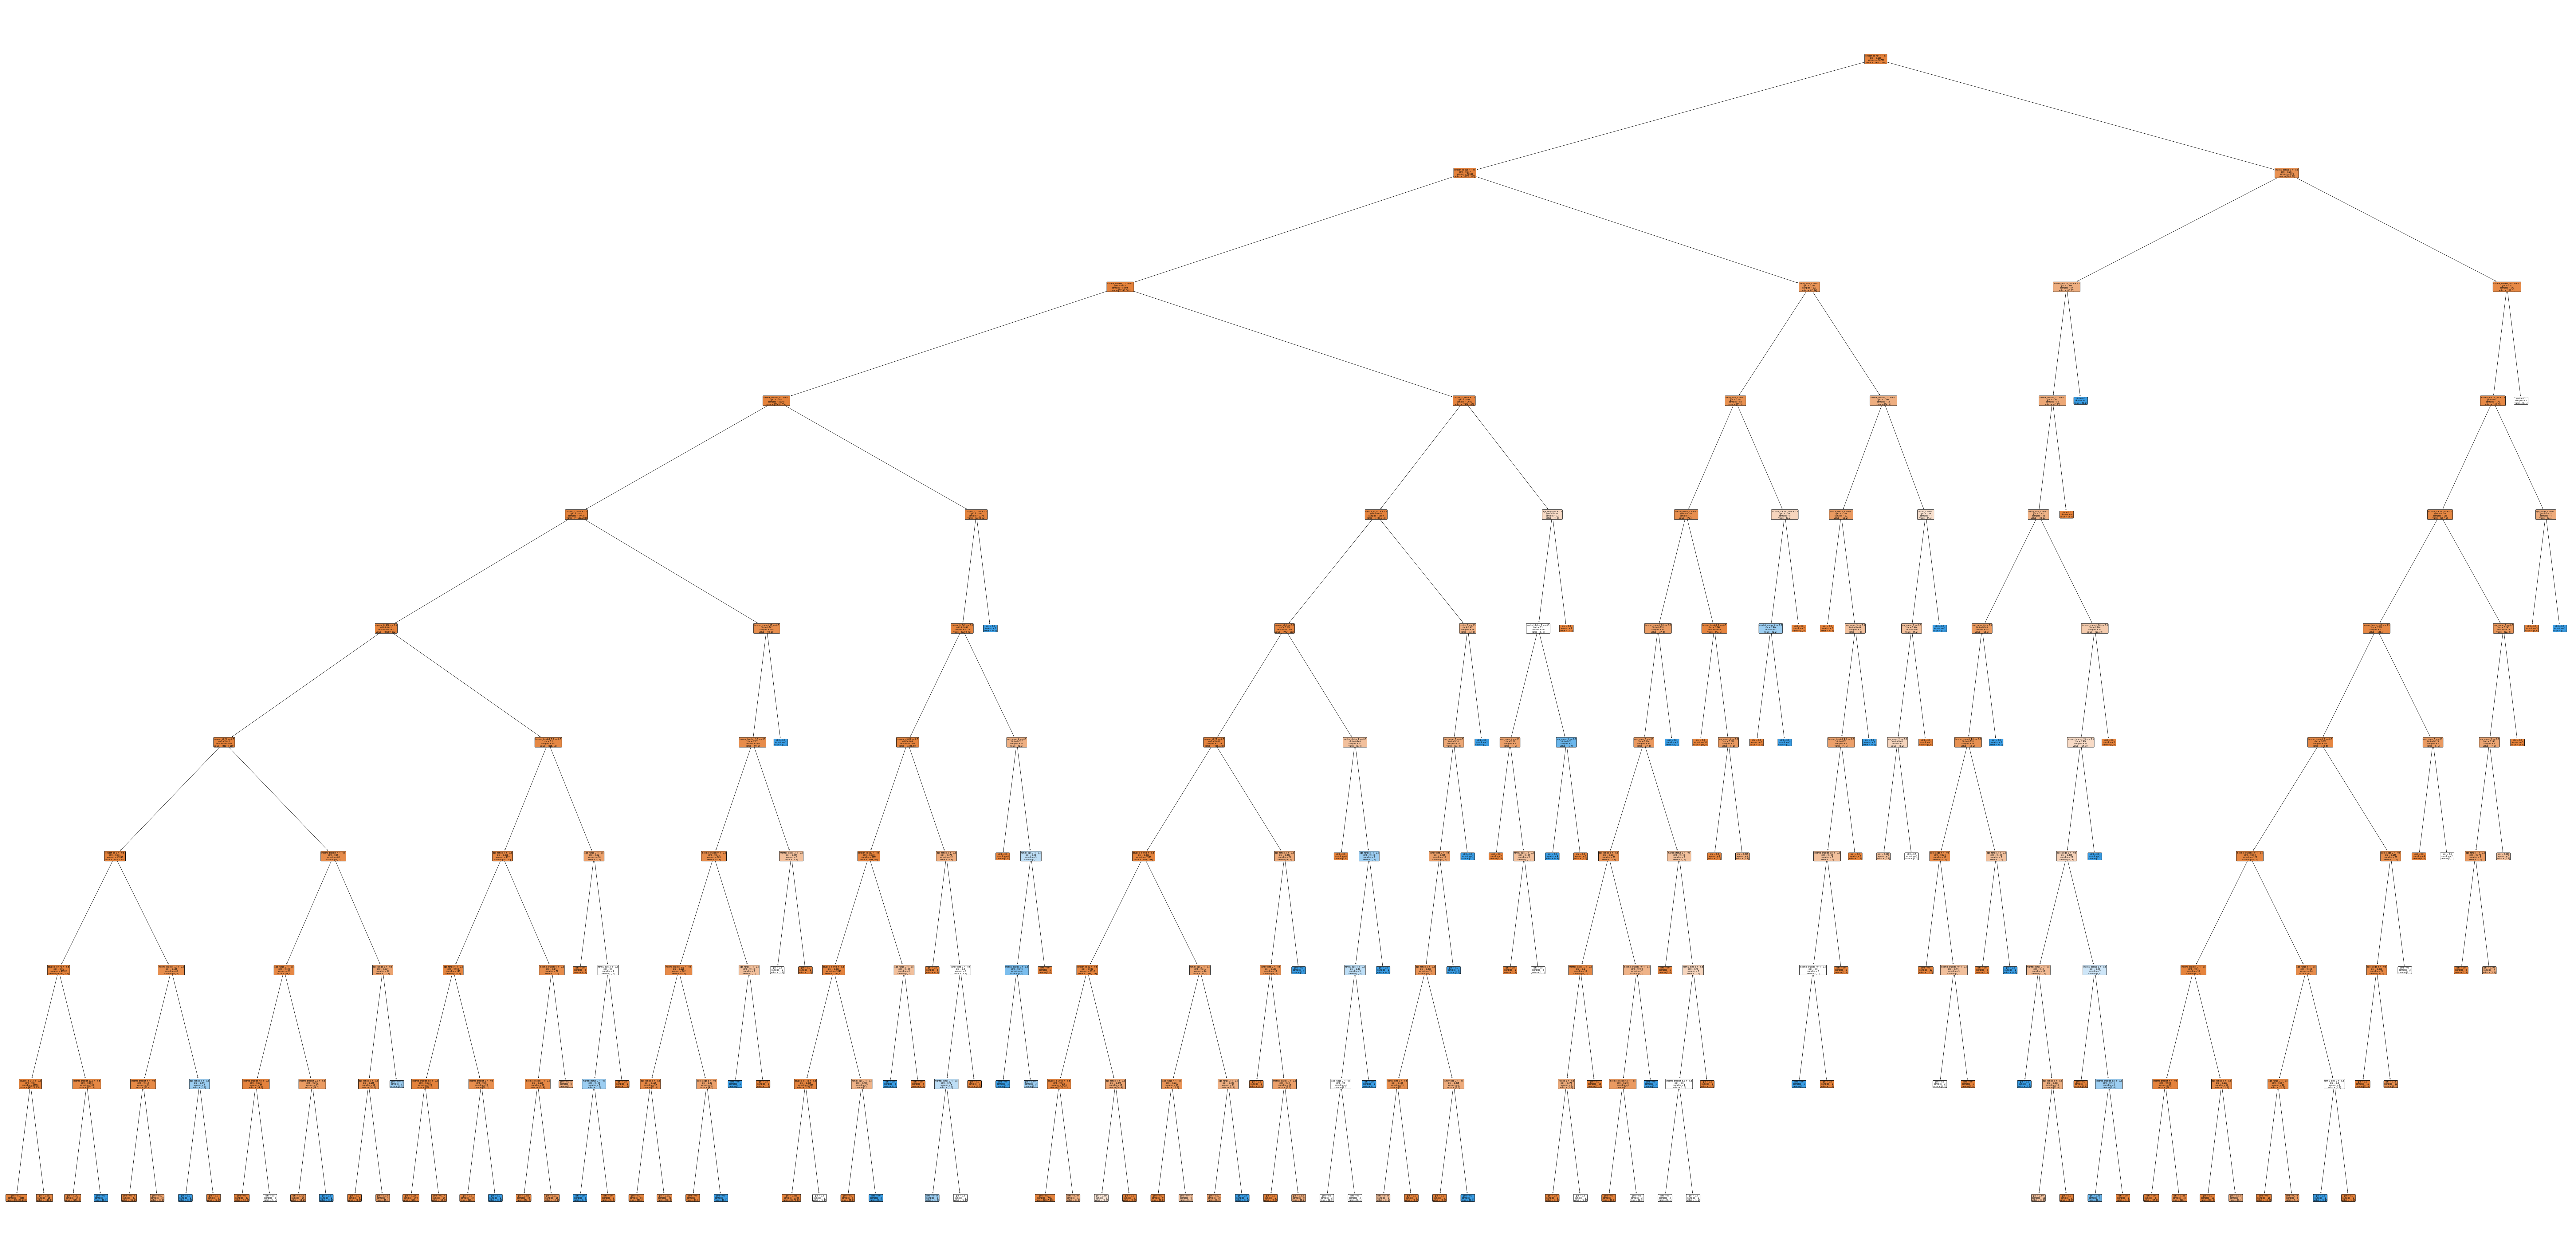

In [88]:
plt.figure(figsize=(150, 75))
plot_tree(dt, filled=True, rounded= True, feature_names=X_train.columns);

In [33]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01708557,
       0.        , 0.        , 0.00691654, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00709609,
       0.01093684, 0.01464631, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

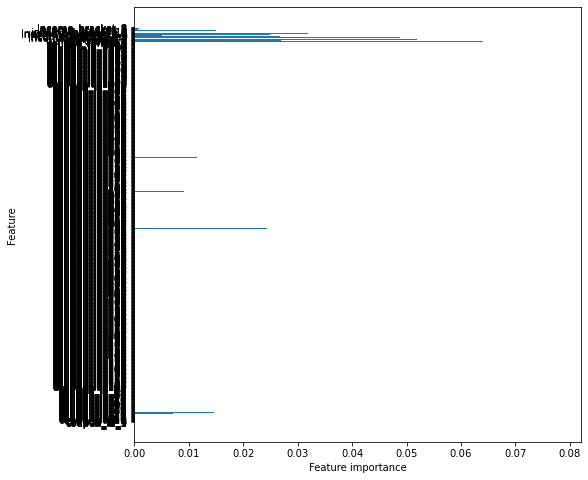

In [34]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

In [90]:
# Test set predictions
pred = dt.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19387    18]
 [  186     2]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       0.10      0.01      0.02       188

    accuracy                           0.99     19593
   macro avg       0.55      0.50      0.51     19593
weighted avg       0.98      0.99      0.99     19593



In [36]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 98.96%


### Deciesion Tree - Cost Complexity Pruning### Deciesion Tree - base

In [30]:
# df_dummies=pd.concat([redemption_status, coupon_id_dummies, age_range_dummies, 
#                       marital_status_dummies, rented_dummies, family_size_dummies, income_bracket_dummies], axis = 1)
# df_dummies.shape
# #df_dummies.head()

(78369, 901)

In [80]:
y = df_dummies['redemption_status']
X = df_dummies.drop('redemption_status', axis = 1)
 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = .75, test_size=.25, random_state=10)

In [ ]:
path = df_dummies.cost_complexity_pruning(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

df_dummies1 = []

for ccp_alpha in ccp_alphas:
    df_dummies = DecisionTreeClassifier(criterion='gini', random_state = 10)
    df_dummies.fit(X_train, y_train)
    df_dummies1. append(df_dummies1)

In [ ]:
train_scores = [clf_df.score(X_train, y_train) for clif_dt in clf_dts]
test_scores = [clf_df.score(X_test, y_test) for clif_dt in clf_dts]


fig, ax = plt.subplotsIO
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and test set')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
ax.show()

In [81]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 10, random_state = 10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=10)

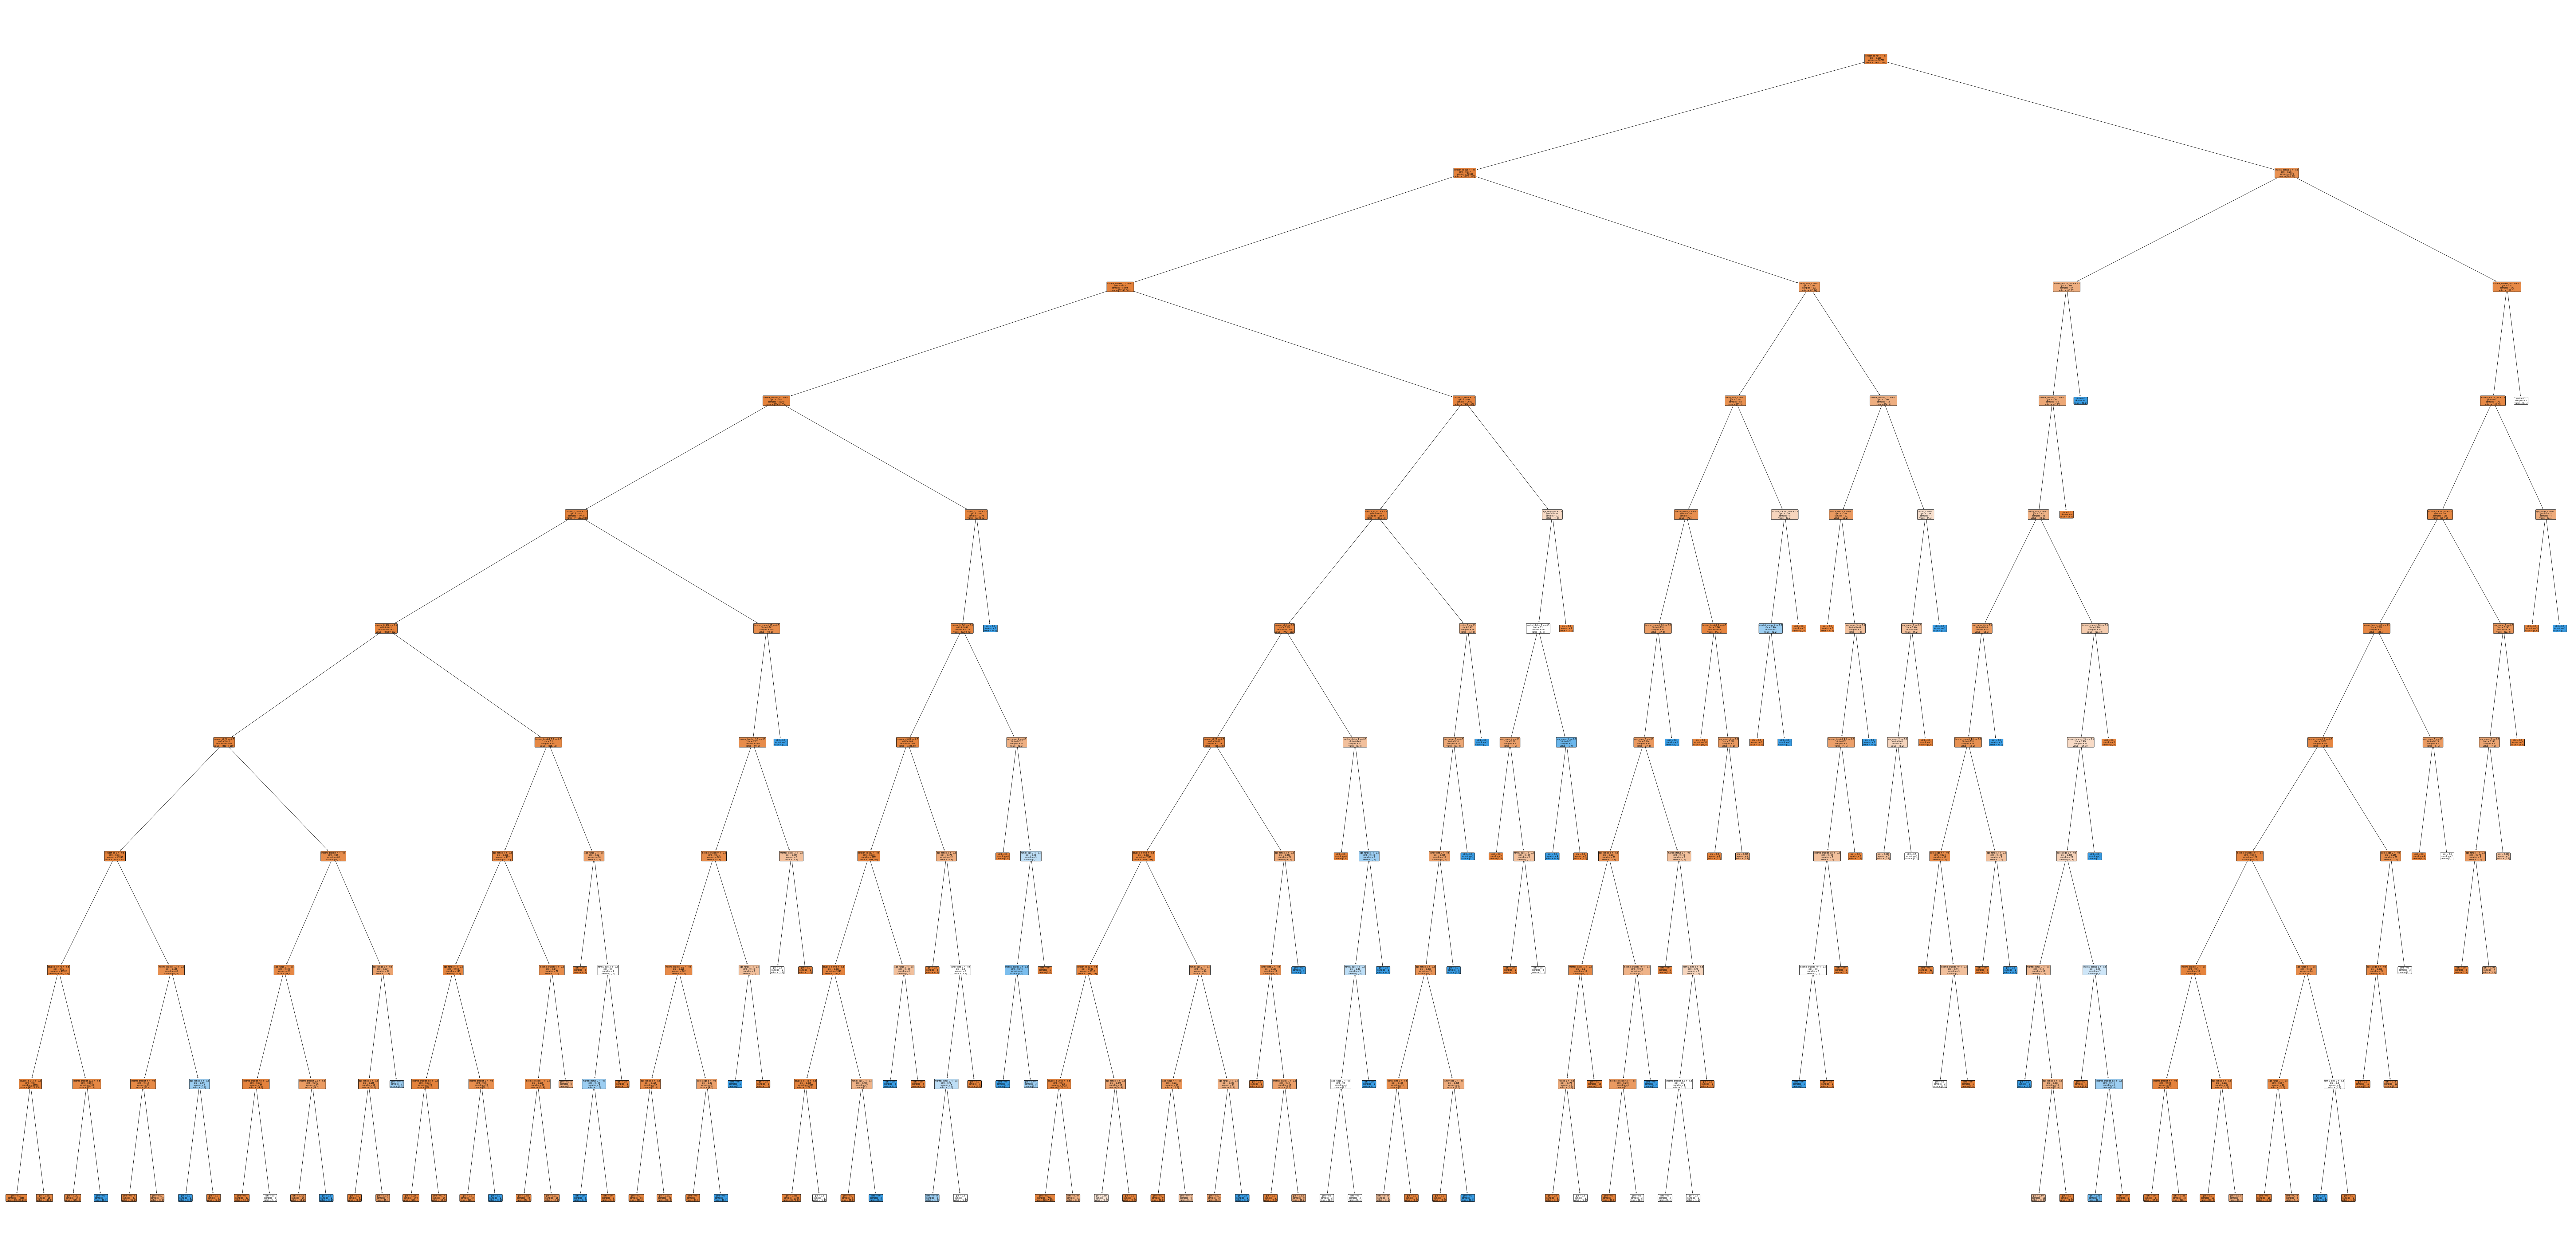

In [88]:
plt.figure(figsize=(150, 75))
plot_tree(dt, filled=True, rounded= True, feature_names=X_train.columns);

In [33]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.01708557,
       0.        , 0.        , 0.00691654, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00709609,
       0.01093684, 0.01464631, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

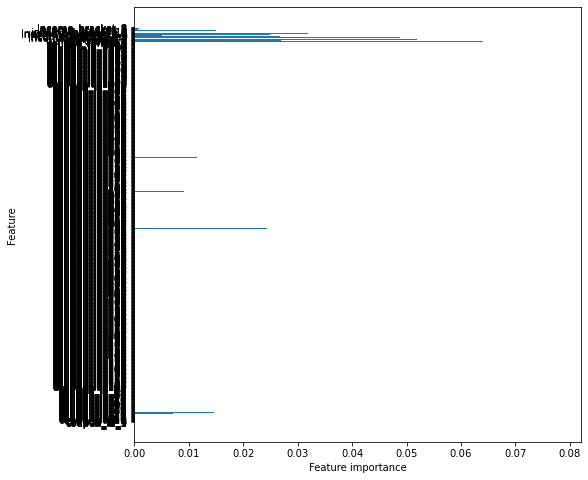

In [34]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

In [90]:
# Test set predictions
pred = dt.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19387    18]
 [  186     2]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19405
           1       0.10      0.01      0.02       188

    accuracy                           0.99     19593
   macro avg       0.55      0.50      0.51     19593
weighted avg       0.98      0.99      0.99     19593



In [36]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 98.96%


### Decision Tree - 2

In [37]:
df_dummies=pd.concat([redemption_status, coupon_id_dummies, age_range_dummies, 
                      marital_status_dummies, rented_dummies, family_size_dummies, income_bracket_dummies], axis = 1)
df_dummies.shape
#df_dummies.head()

(78369, 901)

In [74]:
y = df_dummies['redemption_status']
X = df_dummies.drop('redemption_status', axis = 1)
 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = .75, test_size=.25, random_state=10)

In [75]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 10, random_state = 10,class_weight = 'balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=10)

In [76]:
dt.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.07680362e-02, 0.00000000e+00, 9.44705381e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.33134853e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.73341168e-02,
       4.39682350e-03, 2.41705446e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.39501437e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

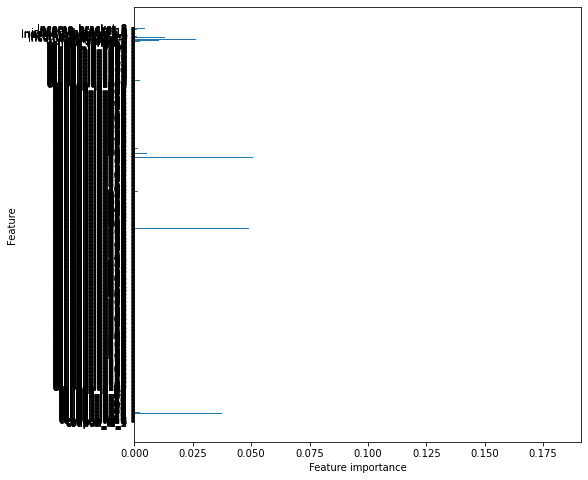

In [77]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

In [78]:
# Test set predictions
pred = dt.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[16219  3186]
 [  126    62]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     19405
           1       0.02      0.33      0.04       188

    accuracy                           0.83     19593
   macro avg       0.51      0.58      0.47     19593
weighted avg       0.98      0.83      0.90     19593



In [79]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 83.1%


### Deciesion Tree - 3

In [57]:
df_3=pd.concat([df['coupon_id'], df['campaign_id'], df['redemption_status'], 
                df['age_range'], marital_status_dummies, rented_dummies, 
                df['family_size'], df['income_bracket']], axis = 1)
df_3.head()

,coupon_id,campaign_id,redemption_status,age_range,marital_status_1,marital_status_3,rented_1,family_size,income_bracket
0,27,13,0,4,0,1,0,1,5
1,116,13,0,3,1,0,0,2,3
2,635,9,0,4,1,0,0,2,7
3,644,13,0,2,0,1,0,0,5
4,1017,8,0,4,1,0,0,2,3


In [58]:
df_3.shape

(78369, 9)

In [69]:
y = df_3['redemption_status']
X = df_3.drop('redemption_status', axis = 1)
 
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = .75, test_size=.25, random_state=10)

In [70]:
dt = DecisionTreeClassifier( criterion= 'gini',random_state = 10, class_weight = 'balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [71]:
pred = dt.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19182   223]
 [  165    23]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19405
           1       0.09      0.12      0.11       188

    accuracy                           0.98     19593
   macro avg       0.54      0.56      0.55     19593
weighted avg       0.98      0.98      0.98     19593



In [72]:
dt.feature_importances_

array([0.53659936, 0.10083078, 0.10027034, 0.01215756, 0.01156067,
       0.00521317, 0.10486008, 0.12850804])

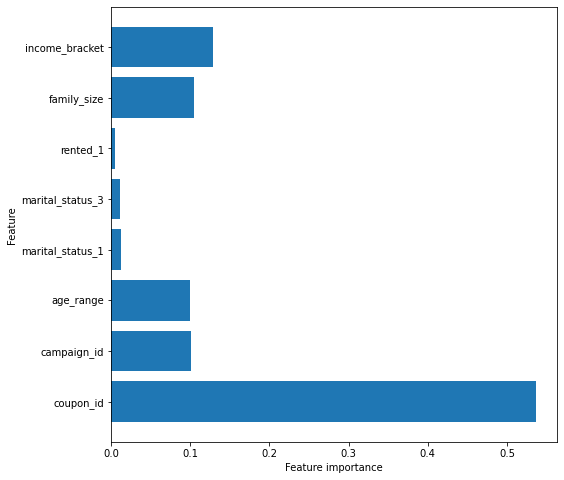

In [73]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

In [66]:
# Test set predictions
pred = dt.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[30699   354]
 [  269    26]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31053
           1       0.07      0.09      0.08       295

    accuracy                           0.98     31348
   macro avg       0.53      0.54      0.53     31348
weighted avg       0.98      0.98      0.98     31348



In [67]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 98.01%


### Random Forest

In [52]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 10)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [53]:
forest.score(X_train, y_train)

0.9910040194806575

In [54]:
forest.score(X_test, y_test)

0.9905895112925864

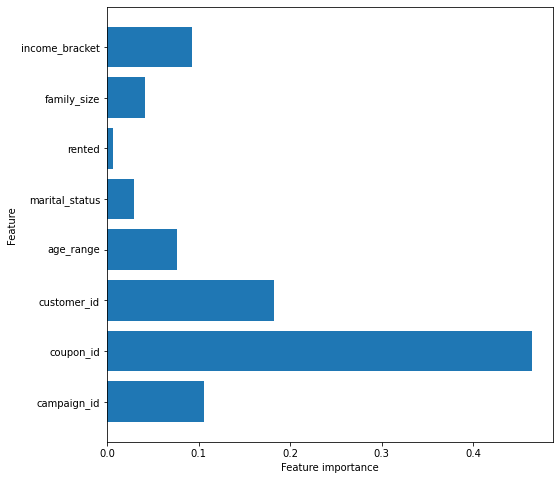

In [55]:
plot_feature_importances(forest)